In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from data.data_handler import data_handler
import matplotlib.pyplot as plt
from data.utils.data_downloader import DataDownloader

In [2]:
## Clinical data
clinical_data =pd.read_csv("/Users/medinils/Desktop/IMC_Spatial_predictions/data/raw_data/METABRIC_IMC/metabric_clinical_data.tsv", sep='\t')
clinical_data.head()

,Study ID,Patient ID,Sample ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,...,Relapse Free Status (Months),Relapse Free Status,Number of Samples Per Patient,Sample Type,Sex,3-Gene classifier subtype,TMB (nonsynonymous),Tumor Size,Tumor Stage,Patient's Vital Status
0,brca_metabric,MB-0000,MB-0000,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NO,claudin-low,...,138.65,0:Not Recurred,1,Primary,Female,ER-/HER2-,0.000000,22.0,2.0,Living
1,brca_metabric,MB-0002,MB-0002,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,NO,LumA,...,83.52,0:Not Recurred,1,Primary,Female,ER+/HER2- High Prolif,2.615035,10.0,1.0,Living
2,brca_metabric,MB-0005,MB-0005,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,YES,LumB,...,151.28,1:Recurred,1,Primary,Female,NaN,2.615035,15.0,2.0,Died of Disease
3,brca_metabric,MB-0006,MB-0006,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,YES,LumB,...,162.76,0:Not Recurred,1,Primary,Female,NaN,1.307518,25.0,2.0,Living
4,brca_metabric,MB-0008,MB-0008,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,YES,LumB,...,18.55,1:Recurred,1,Primary,Female,ER+/HER2- High Prolif,2.615035,40.0,2.0,Died of Disease


In [3]:
# transcriptomic data
downloader = DataDownloader()
downloader.download_data()
cell_data = data_handler.get_dataframe_of('single_cell_data.csv')
cell_data.head()

INFO:DataDownloader:Data already downloaded


,file_id,metabricId,core_id,ImageNumber,ObjectNumber,HH3_total,CK19,CK8_18,Twist,CD68,...,DNA1,DNA2,H3K27me3,CK5,Fibronectin,Location_Center_X,Location_Center_Y,SOM_nodes,pg_cluster,description
0,MB0000_1_527,MB-0000,1,527,1,1.058000,0.000000,0.000000,0.000000,0.618000,...,17.330166,17.718166,0.903333,0.344000,35.934502,161.83333,6.000000,6,24,Fibroblasts
1,MB0000_1_527,MB-0000,1,527,2,0.889243,0.166252,0.166487,0.109148,0.071443,...,28.806173,52.767433,0.781896,0.111391,16.294783,177.30435,15.539130,6,24,Fibroblasts
2,MB0000_1_527,MB-0000,1,527,3,0.861557,0.150873,0.099861,0.064506,0.025316,...,17.687202,29.113506,0.872304,0.542215,16.348177,293.51898,19.886076,6,24,Fibroblasts
3,MB0000_1_527,MB-0000,1,527,4,1.746239,0.069159,0.043478,0.021739,0.623623,...,29.021986,54.447716,0.664442,0.172638,9.053551,165.04347,22.210144,4,20,Fibroblasts CD68+
4,MB0000_1_527,MB-0000,1,527,5,0.979274,0.144429,0.125500,0.067714,0.028940,...,21.988190,43.471428,0.446310,0.057833,9.991821,108.88095,28.523809,6,24,Fibroblasts


In [4]:
#selec in clinical data only patiend id that match metabricId in cell data
clinical_data_filered = clinical_data[clinical_data['Patient ID'].isin(cell_data['metabricId'])]
clinical_data_filered.head()


,Study ID,Patient ID,Sample ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,...,Relapse Free Status (Months),Relapse Free Status,Number of Samples Per Patient,Sample Type,Sex,3-Gene classifier subtype,TMB (nonsynonymous),Tumor Size,Tumor Stage,Patient's Vital Status
0,brca_metabric,MB-0000,MB-0000,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NO,claudin-low,...,138.65,0:Not Recurred,1,Primary,Female,ER-/HER2-,0.000000,22.0,2.0,Living
1,brca_metabric,MB-0002,MB-0002,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,NO,LumA,...,83.52,0:Not Recurred,1,Primary,Female,ER+/HER2- High Prolif,2.615035,10.0,1.0,Living
2,brca_metabric,MB-0005,MB-0005,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,YES,LumB,...,151.28,1:Recurred,1,Primary,Female,NaN,2.615035,15.0,2.0,Died of Disease
5,brca_metabric,MB-0010,MB-0010,78.77,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,NO,LumB,...,2.89,1:Recurred,1,Primary,Female,ER+/HER2- High Prolif,5.230071,31.0,4.0,Died of Disease
6,brca_metabric,MB-0014,MB-0014,56.45,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,YES,LumB,...,162.17,0:Not Recurred,1,Primary,Female,NaN,5.230071,10.0,2.0,Living


In [5]:
# count patient ID in clinical data filtered
clinical_data_filered['Patient ID'].nunique()

# clinical data filered features analysis
clinical_data_filered.describe()


,Age at Diagnosis,Cohort,Neoplasm Histologic Grade,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Relapse Free Status (Months),Number of Samples Per Patient,TMB (nonsynonymous),Tumor Size,Tumor Stage
count,405.000000,405.0,395.000000,386.000000,354.000000,405.000000,404.000000,405.000000,405.0,405.000000,402.000000,391.000000
mean,62.822099,1.0,2.448101,2.927461,3.723164,4.242593,95.430363,87.376444,1.0,4.232483,28.383085,1.930946
std,13.865004,0.0,0.656259,5.255540,3.021580,1.227888,54.380938,51.685563,0.0,4.021234,18.373583,0.634753
min,26.360000,1.0,1.000000,0.000000,1.000000,1.000000,1.233333,1.220000,1.0,0.000000,5.000000,0.000000
25%,52.200000,1.0,2.000000,0.000000,2.000000,3.090000,48.750000,42.530000,1.0,1.307518,19.000000,2.000000
50%,61.280000,1.0,3.000000,1.000000,3.000000,4.054000,96.250000,86.090000,1.0,3.922553,24.000000,2.000000
75%,74.090000,1.0,3.000000,3.000000,5.000000,5.060000,132.766667,127.890000,1.0,5.230071,31.000000,2.000000
max,96.290000,1.0,3.000000,41.000000,28.000000,6.360000,337.033333,210.690000,1.0,36.610496,180.000000,4.000000


In [6]:
#colnames of clinical data
clinical_data_filered.columns

Index(['Study ID', 'Patient ID', 'Sample ID', 'Age at Diagnosis',
       'Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed',
       'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype', 'Cohort',
       'ER status measured by IHC', 'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Number of Samples Per Patient', 'Sample Type', 'Sex',
       '3-Gene classifier subtype', 'TMB (nonsynonymous)', 'Tumor Size',
       'Tumor Stage', 'Patient's Vital Status'],
      dtype='object')

In [7]:
#check data types
clinical_data_filered.dtypes


Study ID                           object
Patient ID                         object
Sample ID                          object
Age at Diagnosis                  float64
Type of Breast Surgery             object
Cancer Type                        object
Cancer Type Detailed               object
Cellularity                        object
Chemotherapy                       object
Pam50 + Claudin-low subtype        object
Cohort                            float64
ER status measured by IHC          object
ER Status                          object
Neoplasm Histologic Grade         float64
HER2 status measured by SNP6       object
HER2 Status                        object
Tumor Other Histologic Subtype     object
Hormone Therapy                    object
Inferred Menopausal State          object
Integrative Cluster                object
Primary Tumor Laterality           object
Lymph nodes examined positive     float64
Mutation Count                    float64
Nottingham prognostic index       

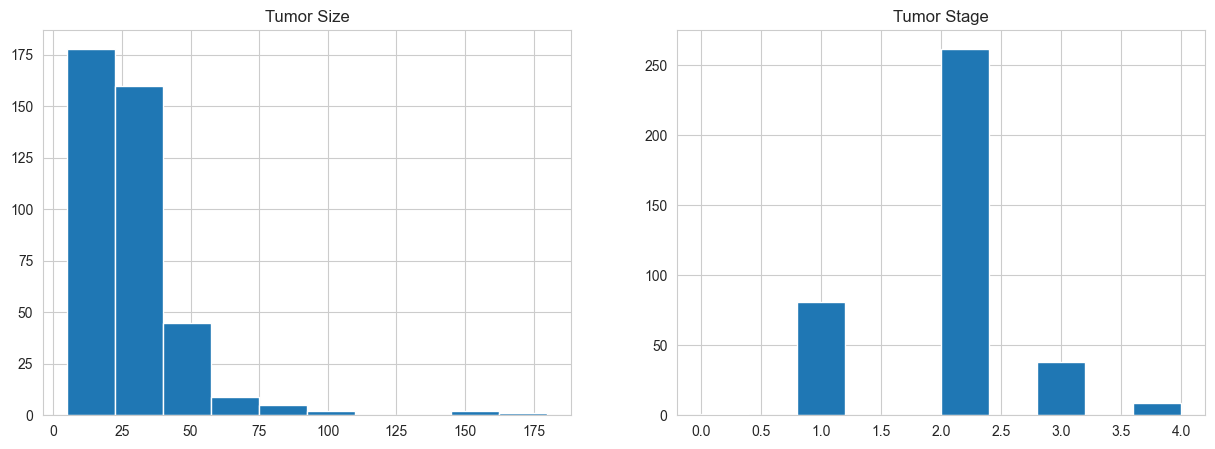

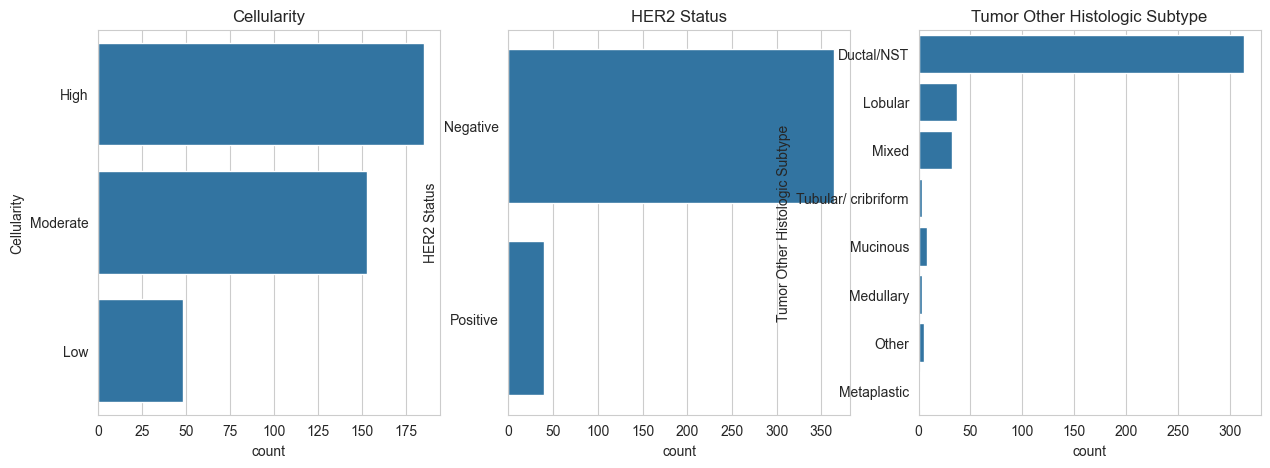

In [8]:
# histogram of tumor stage and tumor size in one row
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].hist(clinical_data_filered['Tumor Size'])
axs[0].set_title('Tumor Size')

axs[1].hist(clinical_data_filered['Tumor Stage'])
axs[1].set_title('Tumor Stage')

plt.show()
# all the plost in one row
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(clinical_data_filered['Cellularity'], ax=axs[0])
axs[0].set_title('Cellularity')

sns.countplot(clinical_data_filered['HER2 Status'], ax=axs[1])
axs[1].set_title('HER2 Status')

sns.countplot(clinical_data_filered['Tumor Other Histologic Subtype'], ax=axs[2])
axs[2].set_title('Tumor Other Histologic Subtype')

plt.show()


In [9]:
# to clinical data filtered add 3 columns from cell data the columns CD68, CD3 y CD20 and use patiend id that match metabricId in cell data 

cell_data_filtered = cell_data[['metabricId', 'CD68', 'CD3', 'CD20']]
clinical_data_filered = clinical_data_filered.merge(cell_data_filtered, left_on='Patient ID', right_on='metabricId')
clinical_data_filered.head()



,Study ID,Patient ID,Sample ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,...,Sex,3-Gene classifier subtype,TMB (nonsynonymous),Tumor Size,Tumor Stage,Patient's Vital Status,metabricId,CD68,CD3,CD20
0,brca_metabric,MB-0000,MB-0000,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NO,claudin-low,...,Female,ER-/HER2-,0.0,22.0,2.0,Living,MB-0000,0.618000,0.000000,0.000000
1,brca_metabric,MB-0000,MB-0000,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NO,claudin-low,...,Female,ER-/HER2-,0.0,22.0,2.0,Living,MB-0000,0.071443,0.025504,0.000000
2,brca_metabric,MB-0000,MB-0000,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NO,claudin-low,...,Female,ER-/HER2-,0.0,22.0,2.0,Living,MB-0000,0.025316,0.037975,0.025316
3,brca_metabric,MB-0000,MB-0000,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NO,claudin-low,...,Female,ER-/HER2-,0.0,22.0,2.0,Living,MB-0000,0.623623,0.055906,0.009065
4,brca_metabric,MB-0000,MB-0000,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NO,claudin-low,...,Female,ER-/HER2-,0.0,22.0,2.0,Living,MB-0000,0.028940,0.011905,0.040607


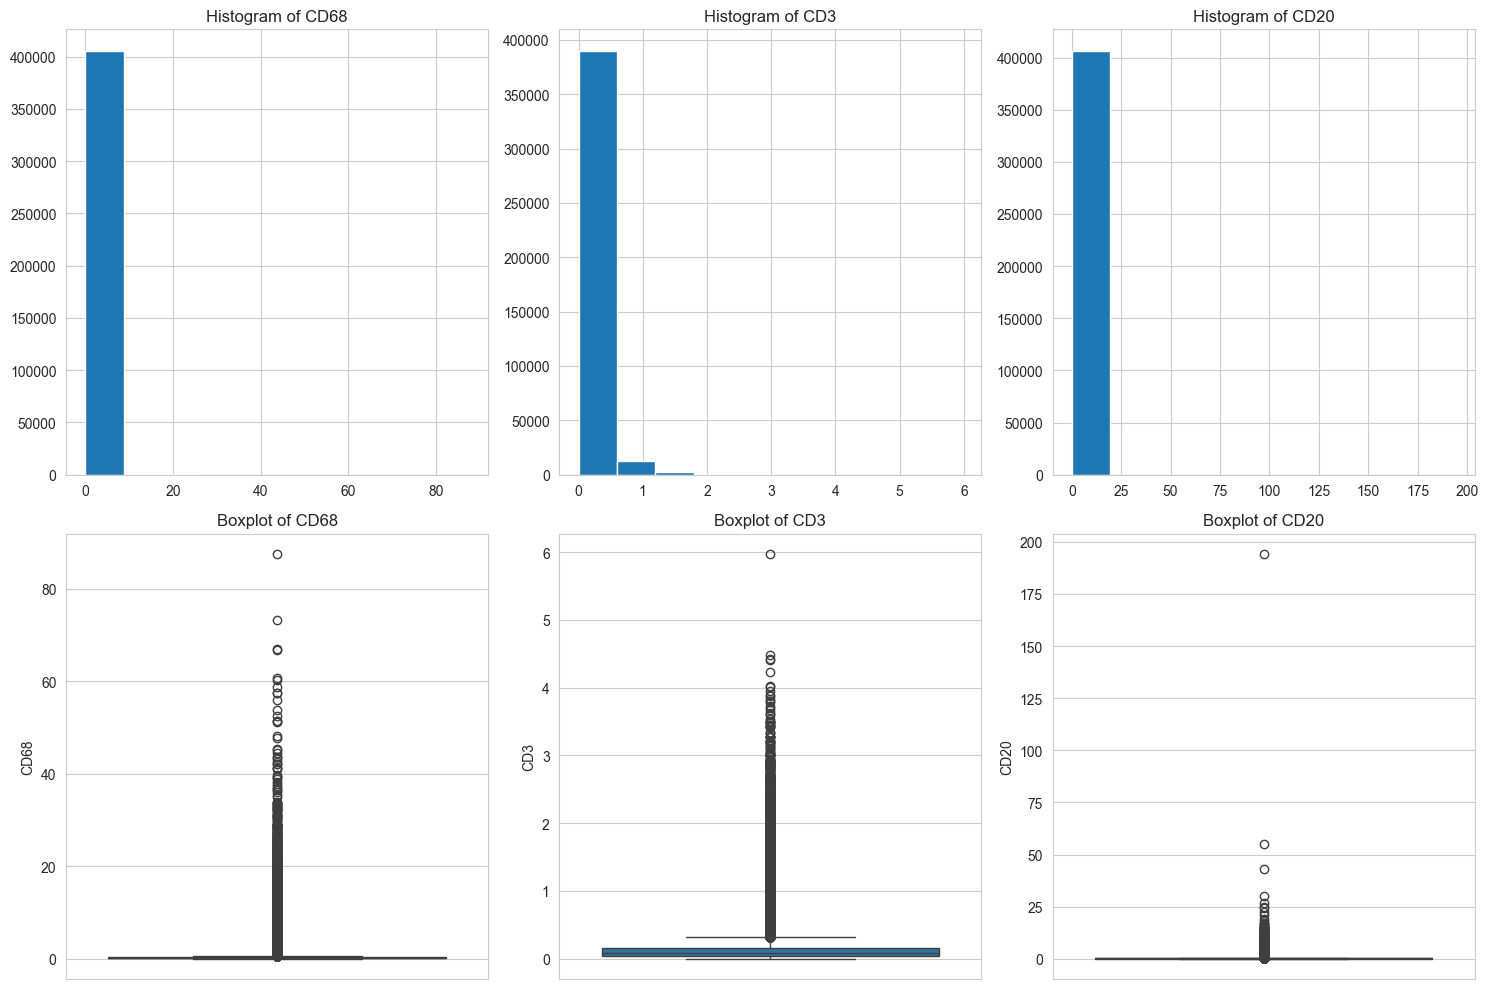

In [10]:
# histogram of CD68, CD3 y CD20 
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Histogramas 
axs[0, 0].hist(clinical_data_filered['CD68'])
axs[0, 0].set_title('Histogram of CD68')

axs[0, 1].hist(clinical_data_filered['CD3'])
axs[0, 1].set_title('Histogram of CD3')

axs[0, 2].hist(clinical_data_filered['CD20'])
axs[0, 2].set_title('Histogram of CD20')

# Boxplots 
sns.boxplot(y=clinical_data_filered['CD68'], ax=axs[1, 0])
axs[1, 0].set_title('Boxplot of CD68')

sns.boxplot(y=clinical_data_filered['CD3'], ax=axs[1, 1])
axs[1, 1].set_title('Boxplot of CD3')

sns.boxplot(y=clinical_data_filered['CD20'], ax=axs[1, 2])
axs[1, 2].set_title('Boxplot of CD20')

plt.tight_layout()
plt.show()


In [11]:
# log transformation of CD68, CD3 y CD20
clinical_log = clinical_data_filered
clinical_log[['CD68', 'CD3', 'CD20']] = np.log1p(clinical_log[['CD68', 'CD3', 'CD20']])
clinical_log.head()


,Study ID,Patient ID,Sample ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,...,Sex,3-Gene classifier subtype,TMB (nonsynonymous),Tumor Size,Tumor Stage,Patient's Vital Status,metabricId,CD68,CD3,CD20
0,brca_metabric,MB-0000,MB-0000,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NO,claudin-low,...,Female,ER-/HER2-,0.0,22.0,2.0,Living,MB-0000,0.481191,0.000000,0.000000
1,brca_metabric,MB-0000,MB-0000,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NO,claudin-low,...,Female,ER-/HER2-,0.0,22.0,2.0,Living,MB-0000,0.069007,0.025185,0.000000
2,brca_metabric,MB-0000,MB-0000,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NO,claudin-low,...,Female,ER-/HER2-,0.0,22.0,2.0,Living,MB-0000,0.025001,0.037271,0.025001
3,brca_metabric,MB-0000,MB-0000,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NO,claudin-low,...,Female,ER-/HER2-,0.0,22.0,2.0,Living,MB-0000,0.484660,0.054399,0.009024
4,brca_metabric,MB-0000,MB-0000,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NO,claudin-low,...,Female,ER-/HER2-,0.0,22.0,2.0,Living,MB-0000,0.028530,0.011834,0.039804


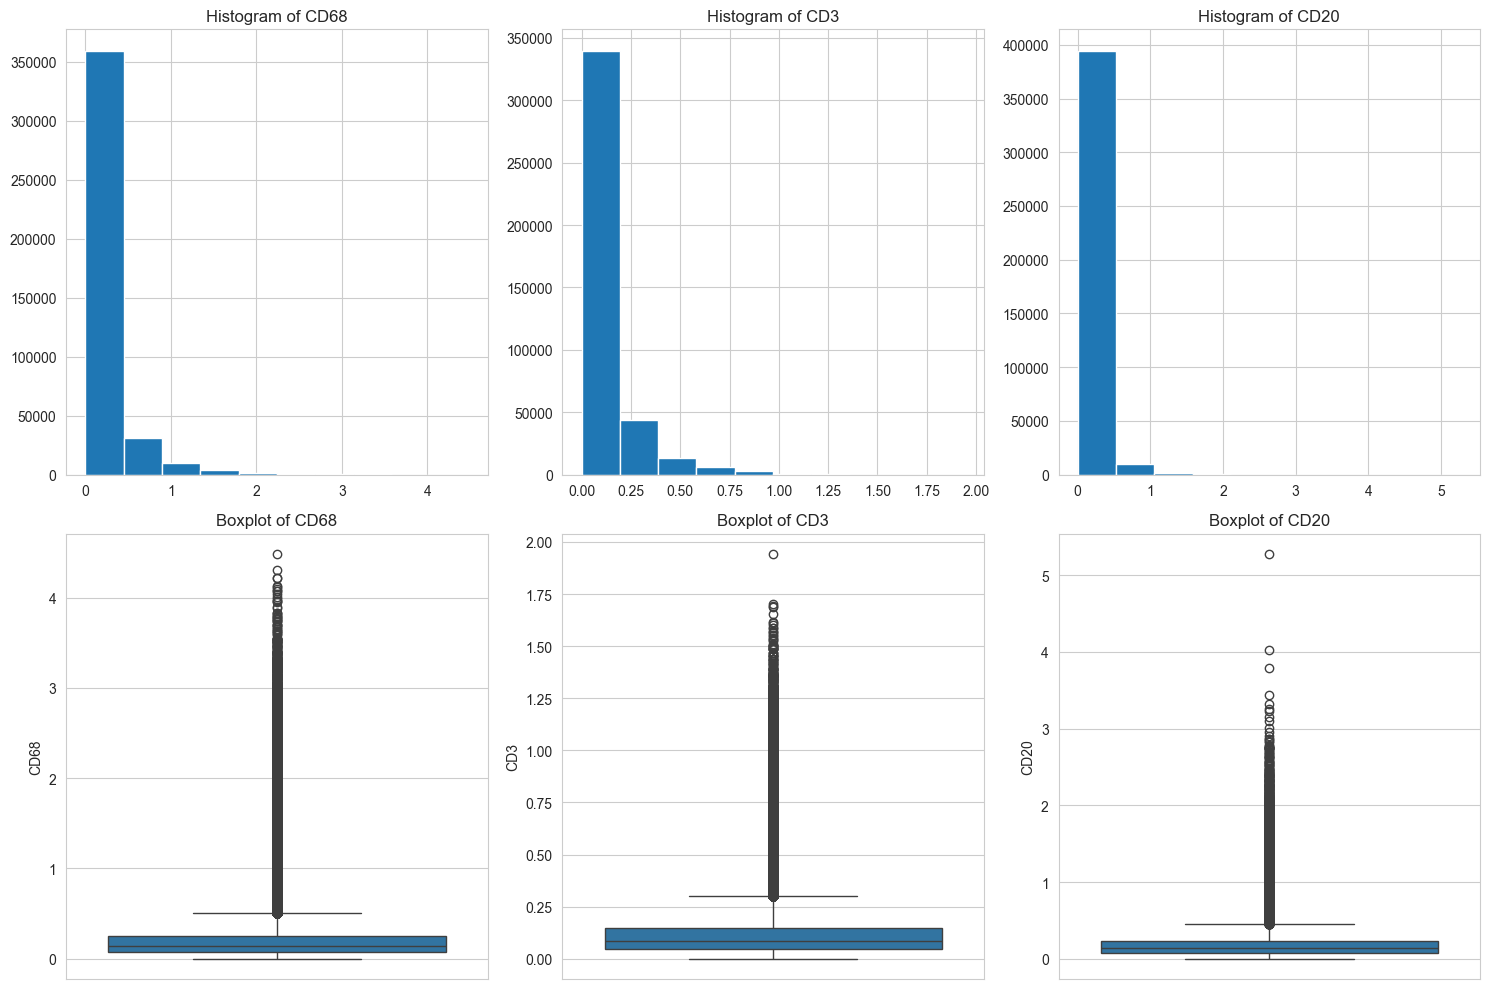

In [12]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Histogramas 
axs[0, 0].hist(clinical_log['CD68'])
axs[0, 0].set_title('Histogram of CD68')

axs[0, 1].hist(clinical_log['CD3'])
axs[0, 1].set_title('Histogram of CD3')

axs[0, 2].hist(clinical_log['CD20'])
axs[0, 2].set_title('Histogram of CD20')

# Boxplots 
sns.boxplot(y=clinical_log['CD68'], ax=axs[1, 0])
axs[1, 0].set_title('Boxplot of CD68')

sns.boxplot(y=clinical_log['CD3'], ax=axs[1, 1])
axs[1, 1].set_title('Boxplot of CD3')

sns.boxplot(y=clinical_log['CD20'], ax=axs[1, 2])
axs[1, 2].set_title('Boxplot of CD20')

plt.tight_layout()
plt.show()

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
clinical_log_scale = clinical_log
clinical_log_scale[['CD68', 'CD3', 'CD20']] = scaler.fit_transform(clinical_log_scale[['CD68', 'CD3', 'CD20']])

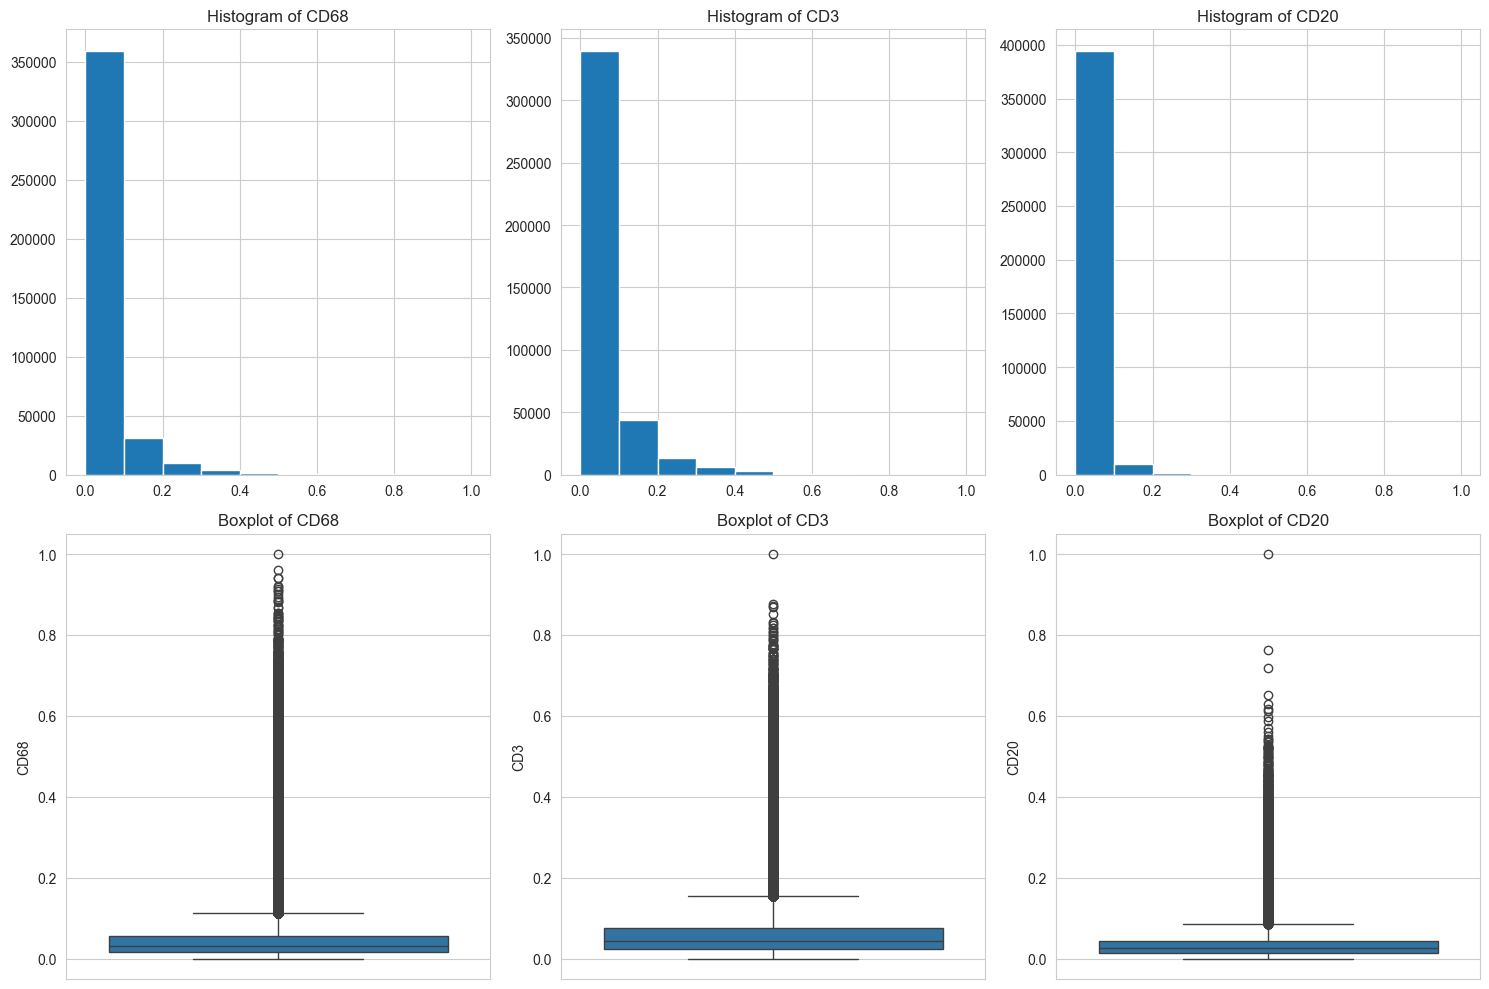

In [18]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Histogramas 
axs[0, 0].hist(clinical_log_scale['CD68'])
axs[0, 0].set_title('Histogram of CD68')

axs[0, 1].hist(clinical_log_scale['CD3'])
axs[0, 1].set_title('Histogram of CD3')

axs[0, 2].hist(clinical_log_scale['CD20'])
axs[0, 2].set_title('Histogram of CD20')

# Boxplots 
sns.boxplot(y=clinical_log_scale['CD68'], ax=axs[1, 0])
axs[1, 0].set_title('Boxplot of CD68')

sns.boxplot(y=clinical_log_scale['CD3'], ax=axs[1, 1])
axs[1, 1].set_title('Boxplot of CD3')

sns.boxplot(y=clinical_log_scale['CD20'], ax=axs[1, 2])
axs[1, 2].set_title('Boxplot of CD20')

plt.tight_layout()
plt.show()

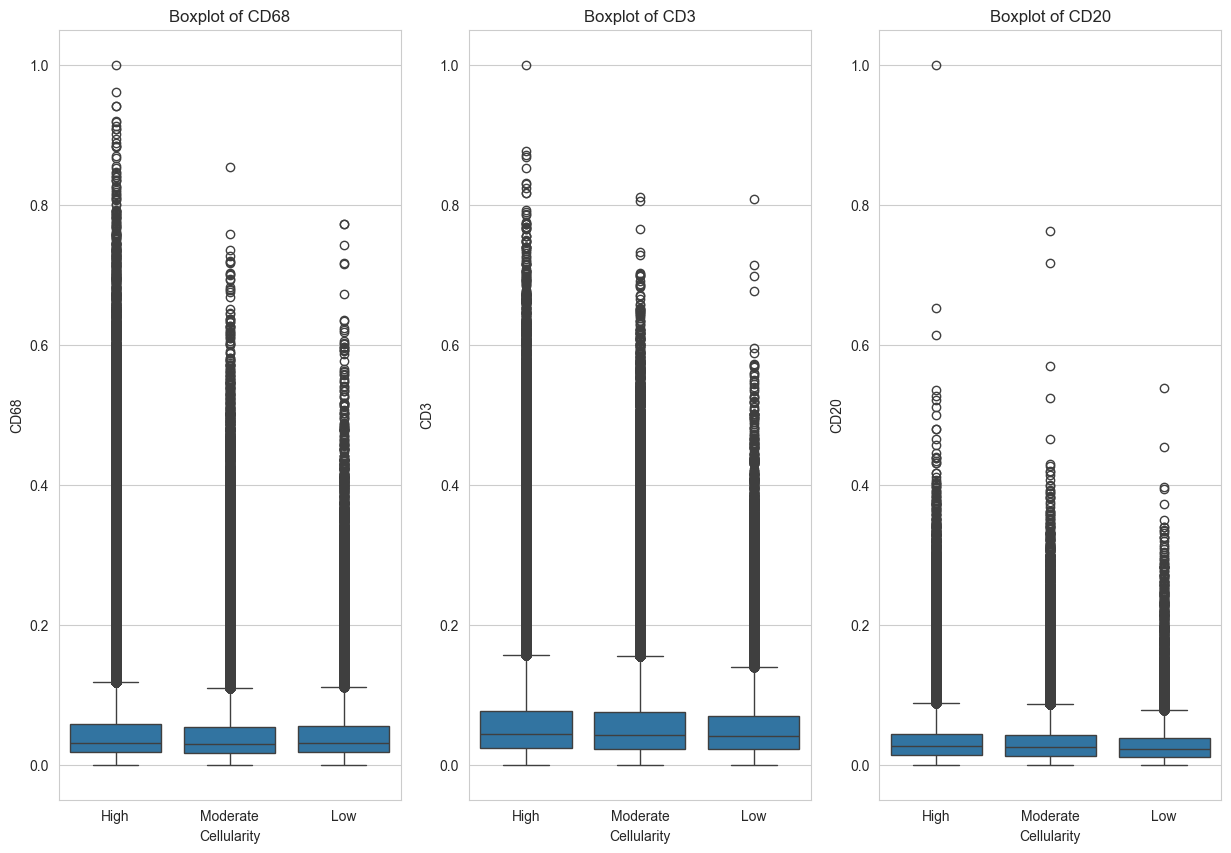

In [19]:
# boxplot of CD68 grouped by Cellularity

fig, axs = plt.subplots(1, 3, figsize=(15, 10))

sns.boxplot(x='Cellularity', y='CD68', data=clinical_log_scale, ax=axs[0])
axs[0].set_title('Boxplot of CD68')

sns.boxplot(x='Cellularity', y='CD3', data=clinical_log_scale, ax=axs[1])
axs[1].set_title('Boxplot of CD3')

sns.boxplot(x='Cellularity', y='CD20', data=clinical_log_scale, ax=axs[2])
axs[2].set_title('Boxplot of CD20')

plt.show()


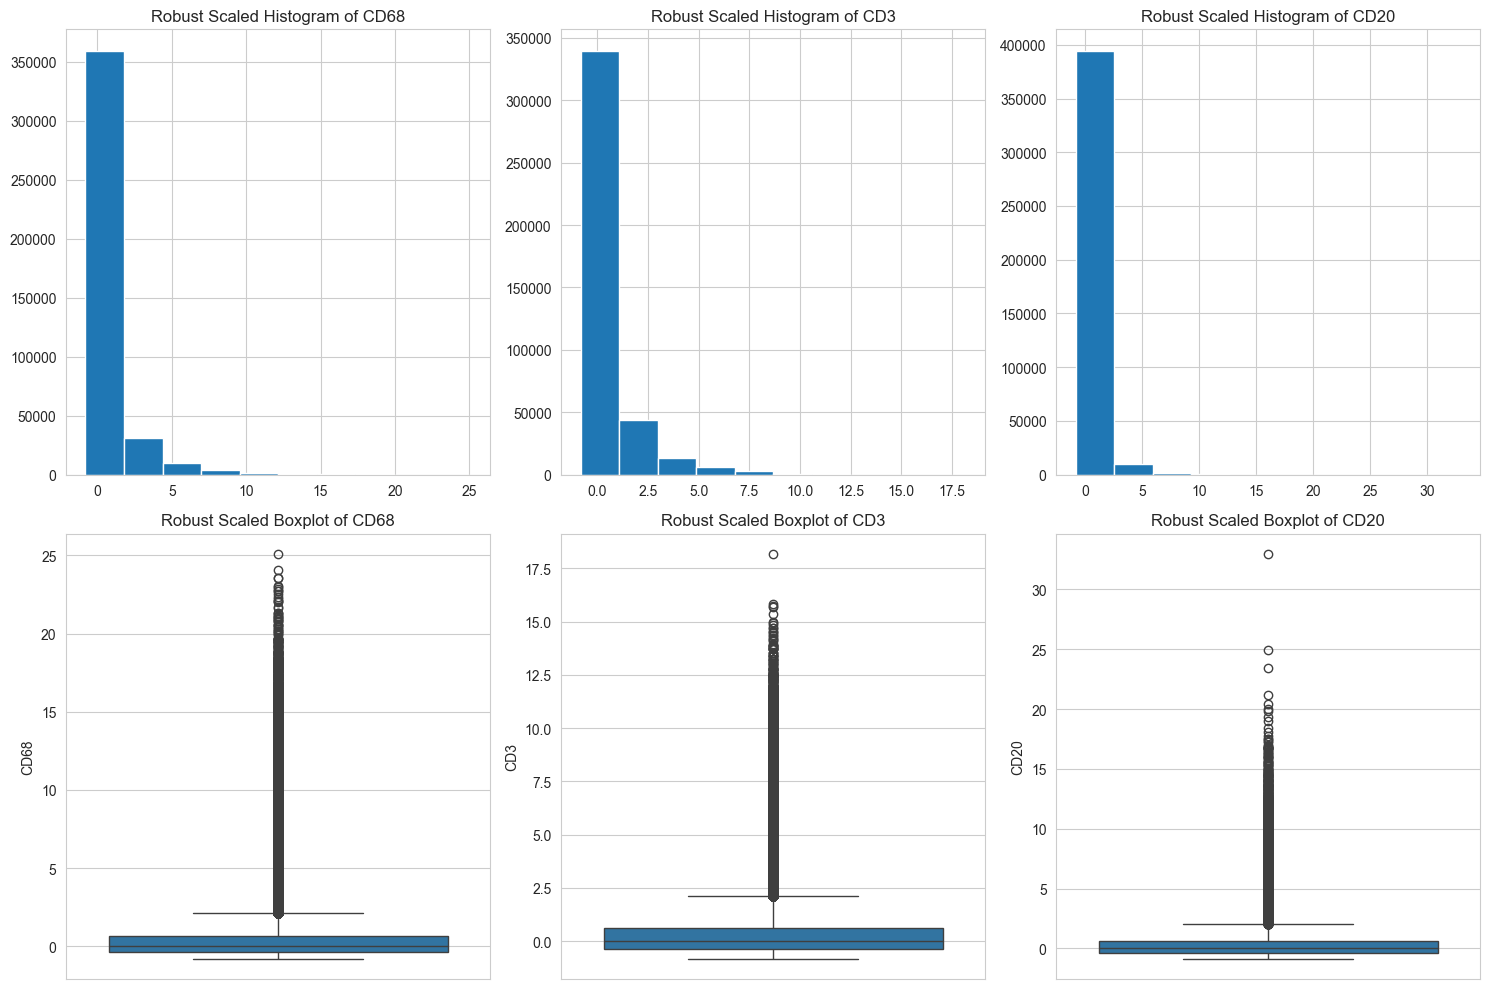

In [20]:
from sklearn.preprocessing import RobustScaler

# Instantiate the scaler
scaler = RobustScaler()

clinical_robust = clinical_log_scale
# Apply RobustScaler to CD68, CD3, CD20
clinical_robust[['CD68', 'CD3', 'CD20']] = scaler.fit_transform(clinical_robust[['CD68', 'CD3', 'CD20']])

# Plot histograms and boxplots again to check the new distribution
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Histograms after Robust Scaling
axs[0, 0].hist(clinical_robust['CD68'])
axs[0, 0].set_title('Robust Scaled Histogram of CD68')
axs[0, 1].hist(clinical_robust['CD3'])
axs[0, 1].set_title('Robust Scaled Histogram of CD3')
axs[0, 2].hist(clinical_robust['CD20'])
axs[0, 2].set_title('Robust Scaled Histogram of CD20')

# Boxplots after Robust Scaling
sns.boxplot(y=clinical_robust['CD68'], ax=axs[1, 0])
axs[1, 0].set_title('Robust Scaled Boxplot of CD68')
sns.boxplot(y=clinical_robust['CD3'], ax=axs[1, 1])
axs[1, 1].set_title('Robust Scaled Boxplot of CD3')
sns.boxplot(y=clinical_robust['CD20'], ax=axs[1, 2])
axs[1, 2].set_title('Robust Scaled Boxplot of CD20')

plt.tight_layout()
plt.show()


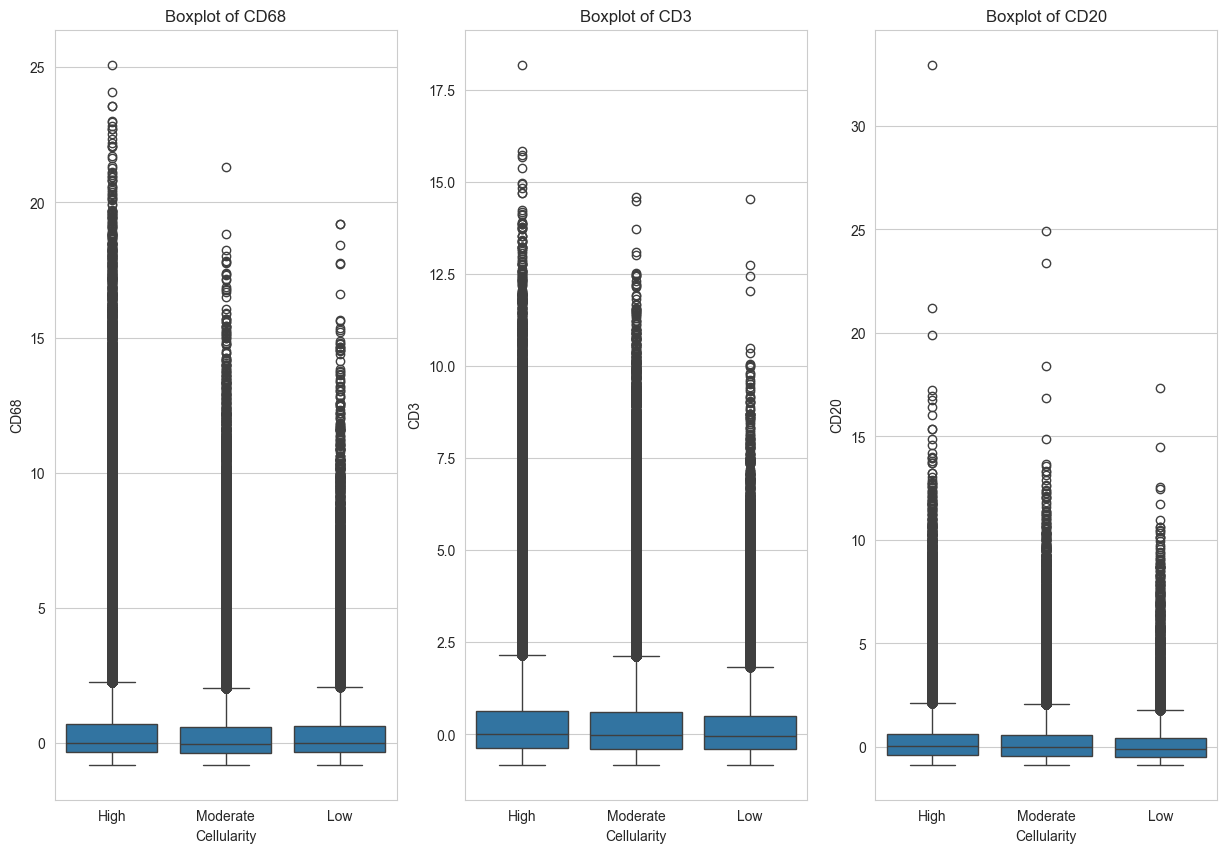

In [21]:
# boxplot of CD68 grouped by Cellularity

fig, axs = plt.subplots(1, 3, figsize=(15, 10))

sns.boxplot(x='Cellularity', y='CD68', data=clinical_robust, ax=axs[0])
axs[0].set_title('Boxplot of CD68')

sns.boxplot(x='Cellularity', y='CD3', data=clinical_robust, ax=axs[1])
axs[1].set_title('Boxplot of CD3')

sns.boxplot(x='Cellularity', y='CD20', data=clinical_robust, ax=axs[2])
axs[2].set_title('Boxplot of CD20')

plt.show()

In [22]:
# apply anova to CD68 grouped by Cellularity
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA para var1 agrupada por 'group'
model_CD68 = ols('CD68 ~ Cellularity', data=clinical_robust).fit()
anova_table_CD68 = sm.stats.anova_lm(model_CD68, typ=2)
print(anova_table_CD68)

model_CD3 = ols('CD3 ~ Cellularity', data=clinical_robust).fit()
anova_table_CD3 = sm.stats.anova_lm(model_CD3, typ=2)
print(anova_table_CD3)

model_CD20 = ols('CD20 ~ Cellularity', data=clinical_robust).fit()
anova_table_CD20 = sm.stats.anova_lm(model_CD20, typ=2)
print(anova_table_CD20)



                   sum_sq        df           F         PR(>F)
Cellularity  1.380264e+03       2.0  231.500405  3.312526e-101
Residual     1.165072e+06  390816.0         NaN            NaN
                    sum_sq        df           F        PR(>F)
Cellularity     885.098099       2.0  219.821974  3.856444e-96
Residual     786796.907572  390816.0         NaN           NaN
                    sum_sq        df           F         PR(>F)
Cellularity     850.976467       2.0  409.514699  2.168329e-178
Residual     406060.172703  390816.0         NaN            NaN


In [23]:
clinical_robust.head()

,Study ID,Patient ID,Sample ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,...,Sex,3-Gene classifier subtype,TMB (nonsynonymous),Tumor Size,Tumor Stage,Patient's Vital Status,metabricId,CD68,CD3,CD20
0,brca_metabric,MB-0000,MB-0000,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NO,claudin-low,...,Female,ER-/HER2-,0.0,22.0,2.0,Living,MB-0000,1.979672,-0.824123,-0.859193
1,brca_metabric,MB-0000,MB-0000,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NO,claudin-low,...,Female,ER-/HER2-,0.0,22.0,2.0,Living,MB-0000,-0.400938,-0.577739,-0.859193
2,brca_metabric,MB-0000,MB-0000,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NO,claudin-low,...,Female,ER-/HER2-,0.0,22.0,2.0,Living,MB-0000,-0.655096,-0.459491,-0.698895
3,brca_metabric,MB-0000,MB-0000,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NO,claudin-low,...,Female,ER-/HER2-,0.0,22.0,2.0,Living,MB-0000,1.999710,-0.291930,-0.801332
4,brca_metabric,MB-0000,MB-0000,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NO,claudin-low,...,Female,ER-/HER2-,0.0,22.0,2.0,Living,MB-0000,-0.634718,-0.708345,-0.603984


In [24]:
#check clinical_robust rows

clinical_robust.shape

# check how many patient ID are in clinical_robust
clinical_robust['Patient ID'].nunique()



405

In [25]:
clinical_robust.shape

(406686, 43)

In [27]:
# final df
selected_columns = clinical_robust[['Patient ID', 'Cellularity', 'CD68', 'CD3', 'CD20']]
clinical_filtered = selected_columns.copy()

# cordinates
location_data = cell_data[['metabricId', 'Location_Center_X', 'Location_Center_Y']]

# Merge
clinical_final = pd.merge(clinical_filtered, location_data, left_on='Patient ID', right_on='metabricId', how='left')

In [31]:
# delete
clinical_final.drop('metabricId', axis=1, inplace=True)

In [32]:
# head
print(clinical_final.head())

  Patient ID Cellularity      CD68       CD3      CD20  Location_Center_X  \
0    MB-0000         NaN  1.979672 -0.824123 -0.859193          161.83333   
1    MB-0000         NaN  1.979672 -0.824123 -0.859193          177.30435   
2    MB-0000         NaN  1.979672 -0.824123 -0.859193          293.51898   
3    MB-0000         NaN  1.979672 -0.824123 -0.859193          165.04347   
4    MB-0000         NaN  1.979672 -0.824123 -0.859193          108.88095   

   Location_Center_Y  
0           6.000000  
1          15.539130  
2          19.886076  
3          22.210144  
4          28.523809  


In [35]:
clinical_final.to_csv("/Users/medinils/Desktop/IMC_Spatial_predictions/data/processed_data/df.csv", index=False)

In [3]:
# read csv 
df = pd.read_csv("/Users/medinils/Desktop/IMC_Spatial_predictions/data/processed_data/df.csv")

df.head()

/var/folders/nb/7f6f4ycn50538pmqf470flx0ncxrsr/T/ipykernel_24945/2182547639.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/medinils/Desktop/IMC_Spatial_predictions/data/processed_data/df.csv")


,Patient ID,Cellularity,CD68,CD3,CD20,Location_Center_X,Location_Center_Y
0,MB-0000,NaN,1.979672,-0.824123,-0.859193,161.83333,6.000000
1,MB-0000,NaN,1.979672,-0.824123,-0.859193,177.30435,15.539130
2,MB-0000,NaN,1.979672,-0.824123,-0.859193,293.51898,19.886076
3,MB-0000,NaN,1.979672,-0.824123,-0.859193,165.04347,22.210144
4,MB-0000,NaN,1.979672,-0.824123,-0.859193,108.88095,28.523809


In [6]:
grouped_cell_data = df.groupby('Patient ID')
grouped_cell_data.head()

,Patient ID,Cellularity,CD68,CD3,CD20,Location_Center_X,Location_Center_Y
0,MB-0000,NaN,1.979672,-0.824123,-0.859193,161.83333,6.000000
1,MB-0000,NaN,1.979672,-0.824123,-0.859193,177.30435,15.539130
2,MB-0000,NaN,1.979672,-0.824123,-0.859193,293.51898,19.886076
3,MB-0000,NaN,1.979672,-0.824123,-0.859193,165.04347,22.210144
4,MB-0000,NaN,1.979672,-0.824123,-0.859193,108.88095,28.523809
...,...,...,...,...,...,...,...
517054540,MB-0906,High,0.567313,-0.093963,-0.244561,285.21570,37.980392
517054541,MB-0906,High,0.567313,-0.093963,-0.244561,272.47827,41.195652
517054542,MB-0906,High,0.567313,-0.093963,-0.244561,294.12790,39.744186
517054543,MB-0906,High,0.567313,-0.093963,-0.244561,301.53333,43.866665


In [4]:
import networkx as nx
import pandas as pd
import numpy as np

# Filtrar los datos del paciente 'MB-0000'
patient_data = df[df['Patient ID'] == 'MB-0000']


In [5]:
# Crear el grafo
G = nx.Graph()

# Añadir nodos con atributos
for index, row in patient_data.iterrows():
    G.add_node(index, CD68=row['CD68'], CD3=row['CD3'], CD20=row['CD20'],
               x=row['Location_Center_X'], y=row['Location_Center_Y'])

# Añadir aristas basadas en la distancia
for node1, attr1 in G.nodes(data=True):
    for node2, attr2 in G.nodes(data=True):
        if node1 != node2:  # Para evitar bucles
            dist = np.sqrt((attr1['x'] - attr2['x'])**2 + (attr1['y'] - attr2['y'])**2)
            if dist < 50:  # Umbral de distancia para crear una arista
                G.add_edge(node1, node2, weight=dist)

# Ahora G contiene el grafo del primer paciente con nodos y aristas basadas en la proximidad espacial

In [ ]:
# Visualizar el grafo
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=5)
plt.show()




In [12]:
G